# Formas de treinamento de modelos

## Regressão linear

Como sabemos, a regressão linear busca encontrar uma equação de coeficientes 'theta' capaz de realizar predições ao computar seus coeficietes com um dado conjunto de entradas 'x':

$$y = \theta_{0} + \theta_{1}x_{1} + \theta_{2}x_{2} + ...+ \theta_{n}x_{n}$$

O valor predito pelo modelo pode ser escrito de forma vetorizada por:

$$ \widehat{y}_{i} = \theta^{T}X_{i} $$

Para encontrar bons valores de 'theta', é necessário usar uma função de custo que verifica o quão bom ou ruim estão as saídas geradas pelo modelo em relação às saídas esperadas. Neste caso, utilizaremos o MSE (do inglês, *mean square error*) devido sua simplicidade em ser minimizado.

$$ MSE = \frac{1}{m}\sum_{i=1}^{m}(\widehat{y} - y_{i}) $$



### Equação normal

A equação normal é um fórmula fechada, que por meio de uma equação, fornece imediatamente os valores de 'theta'.

$$ \widehat{\theta} = (X^{T}X)^{-1}X^{T}Y $$

- X: Matriz de entradas m x n, com m instâncias e n variáveis
- Y: Matriz das saídas esperadas de todo conjunto de dados

A seguir vamos implementar uma equação normal para encontrar os valores de 'theta' para um problema de regressão linear

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
np.random.seed(0)
m = 100
X = 3 * np.random.rand(m, 1)
y = 4 * X + 2 + np.random.randn(m, 1)  # É adicionado um ruído gaussiano

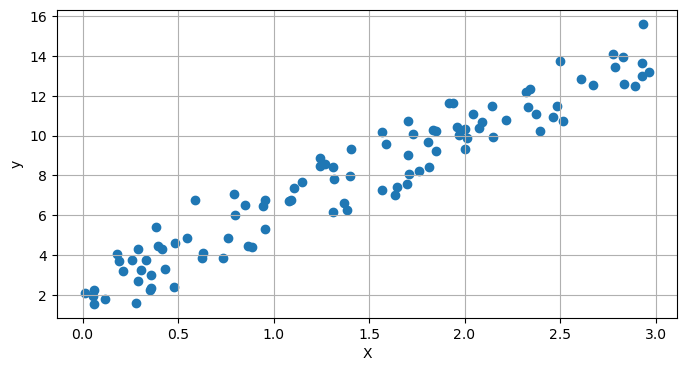

In [31]:
plt.figure(figsize=(8, 4))
plt.grid(True)
plt.xlabel('X')
plt.ylabel('y')
plt.scatter(X, y)

In [38]:
from sklearn.preprocessing import add_dummy_feature

X_b = add_dummy_feature(X) # Adiciona x0 = 1 para cada instância (bias)
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y  # numpy aceita '@' como operador de multiplicação de matrizes
theta_best

array([[2.22215108],
       [3.97897834]])

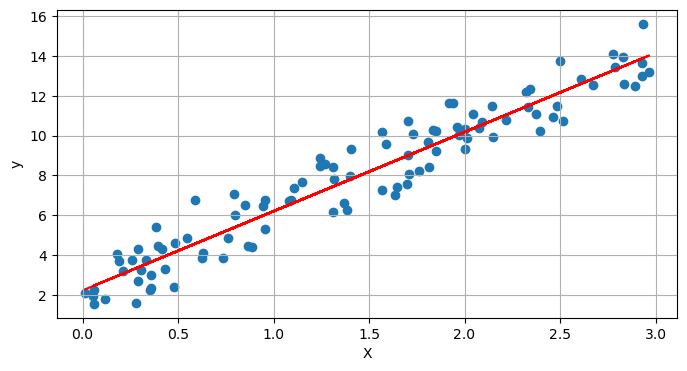

In [77]:
y_pred = X_b @ theta_best  # Valores preditos

plt.figure(figsize=(8, 4))
plt.grid(True)
plt.xlabel('X')
plt.ylabel('y')
plt.scatter(X, y, label="Valores reais")
plt.plot(X, y_pred, 'r', label="Valores preditos")

### Gradiente descendente